# Simple showcasing of least squares and random walks...



In [3]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

import numpy as np


Consider a simple problem : a constant:

Text(0, 0.5, 'Observed Y')

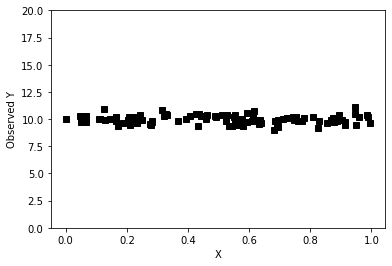

In [7]:
def forward_model(x,a):
    return a

a = 10.0 # True value

x = np.random.rand(100)
y = 0*x + a + np.random.randn(len(x))*0.4

plt.plot(x,y,"ks")
plt.ylim(0,20)
plt.xlabel("X")
plt.ylabel("Observed Y")

Converging to the "true" value of a parameter like 'a' should yield a significant decrease in misfit. It will look like this:

Text(0, 0.5, 'Misfit')

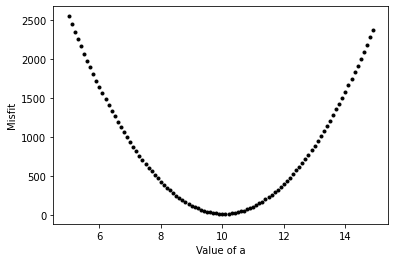

In [8]:
search = np.arange(5.0,15.0,0.1)
misfit = []
for i in search:
    misfit.append(np.sum((y_obs-forward_model(x,i))**2))
    
plt.plot(search,misfit,"k.")
plt.xlabel("Value of a")
plt.ylabel("Misfit")

So the usual game of many algorithms (like Levenberg-Marquart) is to go down such "misfit valley". Assuming that you can go down by increaments of 0.1 a, try to write an algorithm to find a in pseudo-code.

In [9]:
# Option 1 : a bit bruteforce
def forward_model(x,a):
    return x*0 + a

def misfit(y,x,a):
    return np.sum((y-forward_model(x,a))**2)

a_try = np.arange(5,15,0.1)
misfits = np.zeros(a_try.shape)
for i in range(len(a_try)):
    misfits[i] = misfit(y,x,a_try[i])
a_best = a_try[misfits == np.min(misfits)]
print(a_best)

# Option 2 : a bit more clever but not the best (because there is a delay in the search)
def forward_model(x,a):
    return x*0 + a

def misfit(y,x,a):
    return np.sum((y-forward_model(x,a))**2)

a_start = 5.
a_best = 5.0
LS_ = 1000000.
LS_new = misfit(y,x,a_start)
while LS_new<=LS_:
    LS_ = LS_new
    a_best += 0.1
    LS_new = misfit(y,x,a_best)
print(a_best)

[10.]
10.099999999999982


# Hill climbing

Text(0.5, 0, 'Value of a')

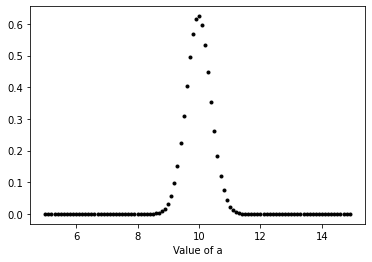

In [11]:
plt.plot(search,np.exp(-0.5*np.array(misfits)/4.0**2),"k.")
plt.xlabel("Value of a")

In [12]:
def forward_model(x,a):
    return x*0 + a

def normal_dist(y,x,a):
    return np.sum(np.exp(-0.5*(y-forward_model(x,a))**2))
    
a_ = 5.0
for i in range(100):
    prob_ = normal_dist(y,x,a_)
    a_new = a_ + 0.1
    prob_new = normal_dist(y,x,a_new)
    if prob_new > prob_:
        a_ = a_new
print(a_)

9.999999999999982
